# 1
Some of the advantages of a CNN over a fully connected deep neural network for image classification are the computational cost reductions, memory reductions and improved accuracy. Computational costs are reduced because pooling layers extract information from a subset of the image using a type of filter, in this way not every pixel needs to be connected into a neuron with every other pixel with a fully connected deep network. Moreover since there are less neurons to work with there are less weights and biases to keep track of and update, therefore resulting in less memory uses due to the smaller amount of parameters. Also accuracy can be increased because there is less of a risk of overfitting due to the smaller number parameters and less reliance on each indiduvial feature of the specific train images. Also, CNNs are better at global feature extraction when it comes to images while fully conencted deep neural networks are more suited for local feature extraction. For images global feautre extractions are more important, giving another advantage to CNN architecture.


# 2
The reason to add a max pooling layer rather than a convolutional layer to the same stride is to extract features from the images after the convolution layers. By doing so it drops inputs and helps with computational complexity. In some models such as LeNet-5 a pooling layer is used after each convolution layer. However AlexNet model stacks convolution layers. It can depend on the problem and model architectures. Generally though, max pooling layers help with feature extraction and model generalization, making it more accurate and less prone to overfitting in a typical model use case.


# 3
Add a local response normalization error after a convolutional error. In this way the information from the connvolutional layer can be more pronounced in the local response normalization as a goal of the layer is to create higher contrast in the activation map. After this a nother connvolutional layer can be included or alternativly dense layers.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [16]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model

In [17]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers import LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

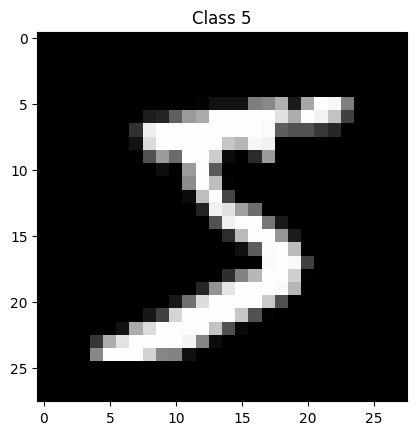

In [19]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [20]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [21]:
number_of_classes = 10

Y_train = to_categorical(y_train, number_of_classes)
Y_test = to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

In [22]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 594,922 (2.27 MB)

 Trainable params: 594,922 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [25]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [26]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [28]:
# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

#model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, validation_data=test_generator, validation_steps=10000//64)
model.fit(train_generator, steps_per_epoch=60000//64, epochs=5, validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 179s 184ms/step - accuracy: 0.8539 - loss: 0.4497 - val_accuracy: 0.9910 - val_loss: 0.0269
Epoch 2/5
  1/937 ━━━━━━━━━━━━━━━━━━━━ 2:24 154ms/step - accuracy: 1.0000 - loss: 0.0156

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 0.9375 - val_loss: 0.0676
Epoch 3/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 175s 186ms/step - accuracy: 0.9794 - loss: 0.0661 - val_accuracy: 0.9915 - val_loss: 0.0248
Epoch 4/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 38us/step - accuracy: 1.0000 - loss: 0.0215 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 5/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 169s 180ms/step - accuracy: 0.9858 - loss: 0.0461 - val_accuracy: 0.9937 - val_loss: 0.0180


In [29]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - accuracy: 0.9917 - loss: 0.0232

Test accuracy:  0.9937000274658203


The model results in accuracy of 0.9937000274658203. The model architecture consits of convolution, activiation and pooling. The 1st and 3rd strides include a batch normalization layer and the 2nd and 4th include maxpooling layer. Then a flatten layer followed by dense layer, activation, normalization layer,  dropout and another dense layer. The final part is a colvulution layer and global pooling layer and final activation layer. The normalization and dropout layers are used to prevent overfitting. Pooling helps with global feature extraction and is used to reduced computational cost from pure convolution layers and also help prevent overfitting. The dataset is the MNIST data set of handwritten digits. CNNs perform very well on this model due to global feature extraction properties. Moreover to further improve the model, image data generator is used to generate image augmentations on the train set including operations such as rotations, shifts and others. Since the features in the base and modified images are the same just different orientations it is a good way to train the model. CNNs are good at global feautre selection not based on individual locations so it is better suited to handle such modifications and it useful for real world data since that is not always orientated in an ideal manner. These qualities of the model lead to the high accuracy value on the test set.

In [31]:
#predictions = model.predict_classes(X_test)
predictions = model.predict(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


# Part 2

In [42]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


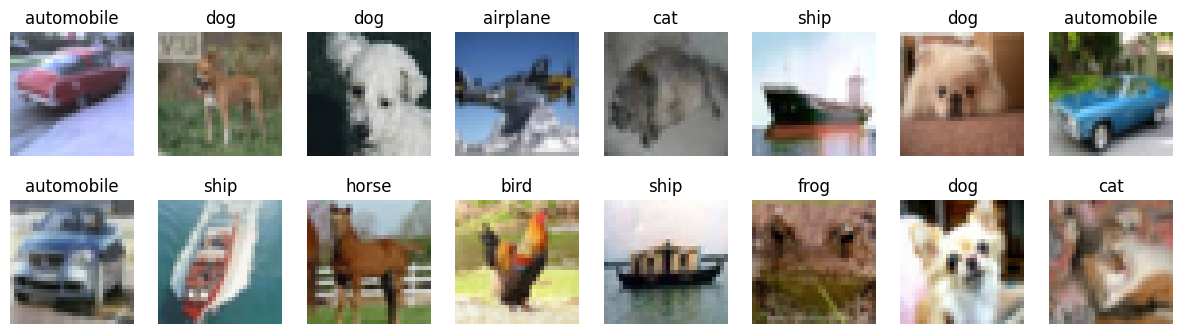

In [34]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",  "dog", "frog", "horse", "ship", "truck"]

# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_train))
    ax = fig.add_subplot(rows, cols, i * rows + j + 1)
    ax.grid('off')
    ax.axis('off')
    ax.imshow(x_train[random_index, :])
    ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [36]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers import LeakyReLU

In [46]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [48]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
print()
print('Test accuracy: ', score[1])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_29 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 890,410 (3.40 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 172s 435ms/step - accuracy: 0.3550 - loss: 1.7451 - val_accuracy: 0.5719 - val_loss: 1.1987
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 207s 448ms/step - accuracy: 0.5871 - loss: 1.1702 - val_accuracy: 0.6398 - val_loss: 1.0280
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 197s 435ms/step - accuracy: 0.6699 - loss: 0.9423 - val_accuracy: 0.6787 - val_loss: 0.9202
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 175s 448ms/step - accuracy: 0.7264 - loss: 0.7915 - val_accuracy: 0.7132 - val_loss: 0.8196
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 445ms/step - accuracy: 0.7556 - loss: 0.6941 - val_accuracy: 0.7249 - val_loss: 0.7860
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7304 - loss: 0.7748

Test accuracy:  0.7249000072479248


With the same architecture as the previous part the accuracy is .7249. The reason for this is a different dataset. The cifar10 dataset contains images of size 32x32 instead of 28x28 and also contains 10 classes. However the images are more complex than the digits so it is harder to distiguish features between the classes. Images are also in color so there are 3 channels Image data generator was also not used. Accuracy is used as a reference to compare to how it changes with relation to the changes made in the following model architectures to see improvement or regressions.

In [51]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=128, epochs=5,  validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
print()
print('Test accuracy: ', score[1])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_39 (Activation)           │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_40 (Activation)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_41 (Activation)           │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 5, 5, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_42 (Activation)           │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_43 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_44 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,978 (406.16 KB)

 Trainable params: 103,978 (406.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 125s 314ms/step - accuracy: 0.2345 - loss: 2.0229 - val_accuracy: 0.3960 - val_loss: 1.6090
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 311ms/step - accuracy: 0.4337 - loss: 1.5296 - val_accuracy: 0.5104 - val_loss: 1.3430
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 125s 319ms/step - accuracy: 0.5358 - loss: 1.2868 - val_accuracy: 0.5532 - val_loss: 1.2521
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 120s 307ms/step - accuracy: 0.5859 - loss: 1.1613 - val_accuracy: 0.5883 - val_loss: 1.1589
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 147s 320ms/step - accuracy: 0.6206 - loss: 1.0811 - val_accuracy: 0.6104 - val_loss: 1.1063
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.6106 - loss: 1.0982

Test accuracy:  0.6104000210762024


The pooling layers were increased to size (3,3) from (2,2) this drastically reduces the total parameters which can help reduce overfitting. In this case the generalization and reduction in parameters results in much less accuracy. Therefore the information that was dropped by the pooling layers are important to the images in this dataset.

In [54]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
print()
print('Test accuracy: ', score[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_57 (Activation)           │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_58 (Activation)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_59 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 890,410 (3.40 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 190s 482ms/step - accuracy: 0.3654 - loss: 1.7324 - val_accuracy: 0.5694 - val_loss: 1.1995
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 179s 458ms/step - accuracy: 0.5984 - loss: 1.1289 - val_accuracy: 0.6549 - val_loss: 0.9853
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 180s 460ms/step - accuracy: 0.6942 - loss: 0.8846 - val_accuracy: 0.7082 - val_loss: 0.8485
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 458ms/step - accuracy: 0.7529 - loss: 0.7159 - val_accuracy: 0.7192 - val_loss: 0.7918
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 456ms/step - accuracy: 0.7897 - loss: 0.6043 - val_accuracy: 0.7417 - val_loss: 0.7556
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7434 - loss: 0.7530

Test accuracy:  0.7416999936103821


For this model the activation functions were changed from relu to leaky relu. The benefit of leaky relu maps negative values to a small negative number rather than to 0 like relu. The reason is that the neurons are not dead in the sense that even negative value neurons contribute to the model by affecting it negativly rather than not at all. This can be useful as some features for example may indicate 1 class but another features presence of lack thereof can also be a key indicator in making a prediction to a classifier problem. For the case of this data set changing to leaky relu results in an .02 increase in accuracy. Default value of 0.1 used for leaky relu alpha value.

In [55]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
print()
print('Test accuracy: ', score[1])

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_60 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 890,410 (3.40 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 227s 575ms/step - accuracy: 0.3361 - loss: 1.8056 - val_accuracy: 0.5608 - val_loss: 1.2672
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 252s 548ms/step - accuracy: 0.5940 - loss: 1.1378 - val_accuracy: 0.6255 - val_loss: 1.0703
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 281s 597ms/step - accuracy: 0.6790 - loss: 0.9204 - val_accuracy: 0.6642 - val_loss: 0.9767
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 224s 572ms/step - accuracy: 0.7321 - loss: 0.7711 - val_accuracy: 0.7123 - val_loss: 0.8329
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 250s 542ms/step - accuracy: 0.7637 - loss: 0.6746 - val_accuracy: 0.7266 - val_loss: 0.8045
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7324 - loss: 0.7920

Test accuracy:  0.7265999913215637


More dropout layers used with dropout rate 0.2 after activation for this test. Dropout is used to remove some neurons at each layer from the training. In this case each neuron has a 20% chance to not be used in that layer for that training pass. The benefit of dropout is reducing overfitting because the neurons are less intertwined and connected due to some dropping out. For this model dropout was used after each activation to see how it would change the results. In this case, the accuracy is about the same as the original implementation but slightly less than the previous implementation. It may be used to frequently in this model which results in some useful neurons dropping out too frequently.

In [60]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))




model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
print()
print('Test accuracy: ', score[1])

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_34 (LeakyReLU)           │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_35 (LeakyReLU)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_36 (LeakyReLU)           │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_75 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_37 (LeakyReLU)           │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_76 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_38 (LeakyReLU)           │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_39 (LeakyReLU)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_64 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,906 (550.41 KB)

 Trainable params: 140,906 (550.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 176s 443ms/step - accuracy: 0.2692 - loss: 1.9377 - val_accuracy: 0.4884 - val_loss: 1.3966
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 224s 499ms/step - accuracy: 0.5361 - loss: 1.2828 - val_accuracy: 0.5916 - val_loss: 1.1671
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 193s 478ms/step - accuracy: 0.6170 - loss: 1.0846 - val_accuracy: 0.6336 - val_loss: 1.0183
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 188s 442ms/step - accuracy: 0.6605 - loss: 0.9676 - val_accuracy: 0.6617 - val_loss: 0.9564
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 442ms/step - accuracy: 0.6957 - loss: 0.8651 - val_accuracy: 0.6854 - val_loss: 0.8989
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.6867 - loss: 0.8951

Test accuracy:  0.6854000091552734


An extra convolution layer, activation layer and max pooling layer block was added. This results in less parameters due to the max pooling layer simplyfing the model by taking out the max value in each filter size 2x2 block in the image. The reduction in parameters and extra feature extraction work results in underfitting as the accuracy decreases since the complexcities of the images are not captured.

In [62]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(1024))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
print()
print('Test accuracy: ', score[1])

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_81 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_45 (LeakyReLU)           │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_46 (LeakyReLU)           │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_47 (LeakyReLU)           │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_48 (LeakyReLU)           │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1024)                │       1,639,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_49 (LeakyReLU)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │          10,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_66 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,715,242 (6.54 MB)

 Trainable params: 1,715,242 (6.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 195s 492ms/step - accuracy: 0.3628 - loss: 1.7335 - val_accuracy: 0.5961 - val_loss: 1.1436
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 213s 520ms/step - accuracy: 0.6320 - loss: 1.0410 - val_accuracy: 0.6783 - val_loss: 0.9215
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 251s 492ms/step - accuracy: 0.7108 - loss: 0.8274 - val_accuracy: 0.7173 - val_loss: 0.8158
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 206s 501ms/step - accuracy: 0.7720 - loss: 0.6546 - val_accuracy: 0.7420 - val_loss: 0.7538
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 192s 491ms/step - accuracy: 0.8165 - loss: 0.5246 - val_accuracy: 0.7458 - val_loss: 0.7648
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.7511 - loss: 0.7596

Test accuracy:  0.7458000183105469


Here the final dense layer after calling the Flatten() layer is increased from 512 to 1024 layers. The result is a higher accuracy than the base model and about the same as the base model with leaky relu activation function. Based on that the change is not worth it due to the increased computational costs with marginal improvements. Overall the model is very complex and has many parameters and layers that can be further optimized and tuned. These examples show how some parameter changes effect accuracy for this dataset.